<a href="https://colab.research.google.com/github/igors96/Lin_Reg_RFReg_SVR/blob/main/Lin_Reg_RFReg_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando a base de dados**

In [1]:
import pandas as pd

df = pd.read_csv("/content/advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Análise Exploratória dos Dados**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

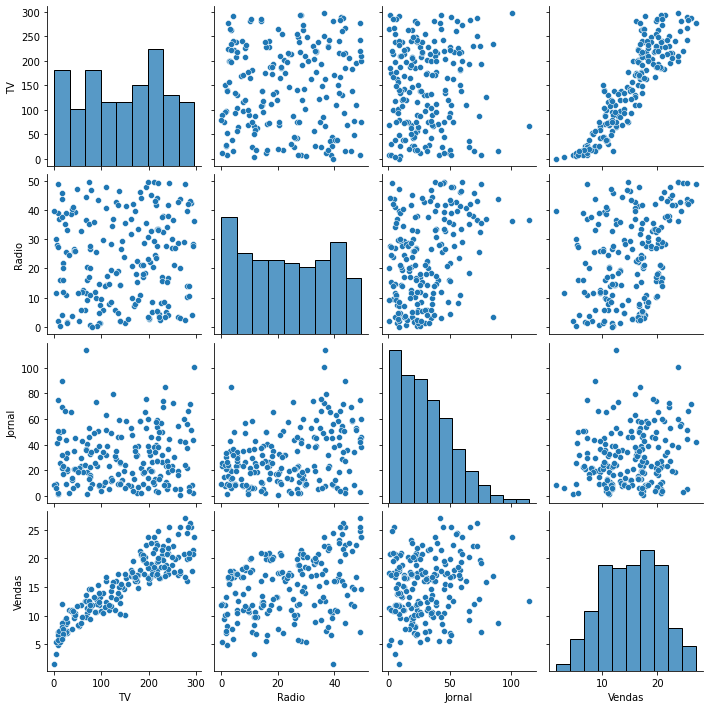

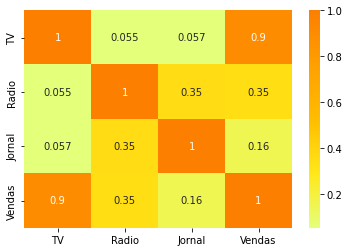

In [3]:
sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), cmap = "Wistia", annot = True)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x = df.drop('Vendas', axis = 1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [5]:
import scipy.stats as stats

# Calculating the Anderson-Darling test
ad_stat, ad_critico, ad_teorico = stats.anderson(y, 'norm')

print(ad_stat)
print(ad_critico)
print(ad_teorico)

if ad_stat < ad_critico[2]:
    print("Com " + str(100 - ad_teorico[2]) + "% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Anderson-Darling")
else:
    print("Com " + str(100 - ad_teorico[2]) + "% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Anderson-Darling")

0.8661293844762668
[0.565 0.644 0.772 0.901 1.071]
[15.  10.   5.   2.5  1. ]
Com 95.0% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Anderson-Darling


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
import numpy as np
import math

In [7]:
# treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

svr_reg = SVR()
svr_reg.fit(x_train, y_train)

SVR()

In [8]:
# teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)
test_pred_svr = svr_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
rmse_lin = math.sqrt(mse_lin)
mae_lin = metrics.mean_absolute_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RMSE da Regressão Linear: {rmse_lin}")
print(f"MAE da Regressão Linear: {mae_lin}")

print('-------------------------------------------------------')

r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
rmse_rf = math.sqrt(mse_rf)
mae_rf = metrics.mean_absolute_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"RMSE do Random Forest: {rmse_rf}")
print(f"MAE do Random Forest: {mae_rf}")

print('-------------------------------------------------------')

r2_svr = metrics.r2_score(y_test, test_pred_svr)
mse_svr = metrics.mean_squared_error(y_test, test_pred_svr)
rmse_svr = math.sqrt(mse_svr)
mae_svr = metrics.mean_absolute_error(y_test, test_pred_svr)
print(f"R² do SVR: {r2_svr}")
print(f"RMSE do SVR: {rmse_svr}")
print(f"MAE do SVR: {mae_svr}")

R² da Regressão Linear: 0.9071151423684273
RMSE da Regressão Linear: 1.5396947656031237
MAE da Regressão Linear: 1.194741713405674
-------------------------------------------------------
R² do Random Forest: 0.9634688373818202
RMSE do Random Forest: 0.9655925814407107
MAE do Random Forest: 0.7480666666666659
-------------------------------------------------------
R² do SVR: 0.8784996204503526
RMSE do SVR: 1.7609660806163132
MAE do SVR: 1.39669180347963


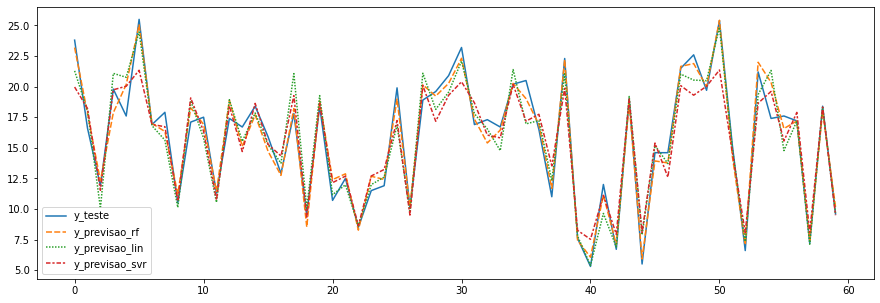

,y_teste,y_previsao_rf,y_previsao_lin,y_previsao_svr
0,23.8,23.195,21.288161,19.967878
1,16.6,17.818,18.042132,18.211419
2,11.9,12.301,10.059590,11.525969
3,19.8,17.869,21.082241,19.743236
4,17.6,20.173,20.764760,20.033111
5,25.5,25.049,24.471874,21.337837
6,16.9,16.986,16.806436,16.911375
7,17.9,16.334,15.628857,16.721611
8,10.5,11.212,10.124799,10.643134
9,17.1,18.269,18.846019,19.075844


In [9]:
df_resultado = pd.DataFrame()
# df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado['y_previsao_svr'] = test_pred_svr
# display(df_resultado)
df_resultado = df_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

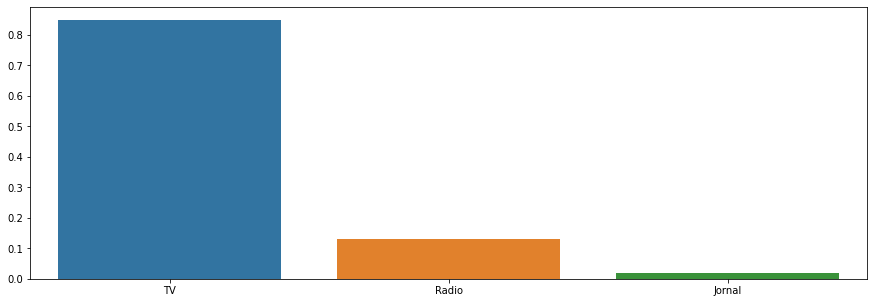

In [10]:
# Importância de cada variável para as vendas
# importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()